In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [328]:
#loading the dataset
df=pd.read_csv('Used_car_price.csv')
df.head()

,Unnamed: 0,manufactured,brand,varient,owner,fuel,type,kms,price,city
0,0,2012,Maruti,"['Swift', 'Dzire']",1st Owner,Diesel,Manual,"1,18,117 km",316399,New Delhi
1,1,2013,Maruti,['Swift'],1st Owner,Diesel,Manual,"1,14,506 km",341599,New Delhi
2,2,2014,Maruti,['Ritz'],1st Owner,Diesel,Manual,"43,382 km",344199,New Delhi
3,3,2013,Hyundai,['i20'],1st Owner,Diesel,Manual,"64,361 km",355799,New Delhi
4,4,2014,Maruti,['Swift'],1st Owner,Petrol,Manual,"1,07,206 km",401599,New Delhi


Varient column is saved as list item

In [329]:
#checking the voulume of data
df.shape

(5387, 10)

In [330]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5387 entries, 0 to 5386
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    5387 non-null   int64 
 1   manufactured  5387 non-null   int64 
 2   brand         5387 non-null   object
 3   varient       5387 non-null   object
 4   owner         5387 non-null   object
 5   fuel          5387 non-null   object
 6   type          5192 non-null   object
 7   kms           5387 non-null   object
 8   price         5387 non-null   object
 9   city          5387 non-null   object
dtypes: int64(2), object(8)
memory usage: 421.0+ KB


(i) Found the Kms columns in string need to convert in number

(ii) The target variable is numerical and continuous so this is a regression problem

In [331]:
df["varient"]=df["varient"].str.replace('[','').str.replace(']','').str.replace(',','').str.replace("'","")


In [332]:
df["price"]=df["price"].str.replace(',','')


In [333]:
df["kms"]=df["kms"].str.replace('kms','').str.replace(',','').str.replace('km','')

In [334]:
df["kms"]=df["kms"].astype(int)

In [335]:
df["price"]=df["price"].astype(int)

In [336]:
df.head()

,Unnamed: 0,manufactured,brand,varient,owner,fuel,type,kms,price,city
0,0,2012,Maruti,Swift Dzire,1st Owner,Diesel,Manual,118117,316399,New Delhi
1,1,2013,Maruti,Swift,1st Owner,Diesel,Manual,114506,341599,New Delhi
2,2,2014,Maruti,Ritz,1st Owner,Diesel,Manual,43382,344199,New Delhi
3,3,2013,Hyundai,i20,1st Owner,Diesel,Manual,64361,355799,New Delhi
4,4,2014,Maruti,Swift,1st Owner,Petrol,Manual,107206,401599,New Delhi


In [337]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [338]:
df.head()

,manufactured,brand,varient,owner,fuel,type,kms,price,city
0,2012,Maruti,Swift Dzire,1st Owner,Diesel,Manual,118117,316399,New Delhi
1,2013,Maruti,Swift,1st Owner,Diesel,Manual,114506,341599,New Delhi
2,2014,Maruti,Ritz,1st Owner,Diesel,Manual,43382,344199,New Delhi
3,2013,Hyundai,i20,1st Owner,Diesel,Manual,64361,355799,New Delhi
4,2014,Maruti,Swift,1st Owner,Petrol,Manual,107206,401599,New Delhi


In [339]:
df['brand'].value_counts()

Maruti           2627
Hyundai          1203
Honda             346
Ford              330
Renault           193
Toyota            169
Volkswagen        112
Tata              107
Mahindra           91
MG                 30
Datsun             28
BMW                25
Skoda              23
Nissan             22
Jeep               16
KIA                15
Mercedes-Benz      11
Kia                 8
Audi                7
Chevrolet           7
Volvo               4
Jaguar              4
HYUNDAI             3
Ambassador          2
Mercedes            1
Landrover           1
Mitsubishi          1
Land                1
Name: brand, dtype: int64

In [340]:
df['varient'].value_counts()

Swift                      417
Grand i10                  320
Baleno                     290
Alto 800                   272
Ecosport                   246
                          ... 
Manza                        1
Freelander 2                 1
Indica                       1
Indigo                       1
Rover Range Rover Velar      1
Name: varient, Length: 163, dtype: int64

In [341]:
df['owner'].value_counts()

1st Owner       3811
2nd Owner        804
-                491
First Owner      163
3rd Owner         66
Second Owner      40
4th Owner          6
Third Owner        6
Name: owner, dtype: int64

In [342]:
df["owner"]=df["owner"].str.replace('First','1st').str.replace('Second','2nd').str.replace('Third','3rd')

In [343]:
df["brand"]=df["brand"].str.replace('HYUNDAI','Hyundai')

In [344]:
df['owner'].value_counts()

1st Owner    3974
2nd Owner     844
-             491
3rd Owner      72
4th Owner       6
Name: owner, dtype: int64

In [345]:
df['fuel'].value_counts()

Petrol          3686
Diesel          1660
Petrol + CNG      32
CNG                8
Petrol + LPG       1
Name: fuel, dtype: int64

In [346]:
df['type'].value_counts()

Manual       3987
manual        593
Automatic     505
automatic     107
Name: type, dtype: int64

In [347]:
df["type"]=df["type"].str.replace('manual','Manual').str.replace('automatic','Automatic')

In [348]:
df['type'].value_counts()

Manual       4580
Automatic     612
Name: type, dtype: int64

In [349]:
df['city'].value_counts()

Mumbai       1000
New Delhi     500
Gurgaon       500
Pune          500
Noida         500
Chennai       488
Bengaluru     444
Ahmedabad     383
Kolkata       271
Hyderabad     101
chennai        80
kolkata        80
jaipur         60
new-delhi      60
mumbai         60
ahmedabad      60
hyderabad      60
gurgaon        60
delhi-ncr      60
bangalore      60
noida          60
Name: city, dtype: int64

In [350]:
df["city"]=df["city"].str.replace('new-delhi','New Delhi')
df["city"]=df["city"].str.replace('kolkata','Kolkata')
df["city"]=df["city"].str.replace('bangaluru','Bengaluru')
df["city"]=df["city"].str.replace('bangalore','Bengaluru')
df["city"]=df["city"].str.replace('delhi-ncr','New Delhi')
df["city"]=df["city"].str.replace('noida','Noida')
df["city"]=df["city"].str.replace('hyderabad','Hyderabad')
df["city"]=df["city"].str.replace('chennai','Chennai')
df["city"]=df["city"].str.replace('mumbai','Mumbai')
df["city"]=df["city"].str.replace('ahmedabad','Ahmedabad')
df["city"]=df["city"].str.replace('gurgaon','Gurgaon')
df["city"]=df["city"].str.replace('jaipur','Jaipur')

In [351]:
df['city'].value_counts()

Mumbai       1060
New Delhi     620
Chennai       568
Noida         560
Gurgaon       560
Bengaluru     504
Pune          500
Ahmedabad     443
Kolkata       351
Hyderabad     161
Jaipur         60
Name: city, dtype: int64

In [352]:
df['owner'] = df['owner'].replace('-', np.NaN)

In [353]:
df.isnull().sum()

manufactured      0
brand             0
varient           0
owner           491
fuel              0
type            195
kms               0
price             0
city              0
dtype: int64

In [354]:
df1=df.loc[df['owner'].isnull() == True]

In [355]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 4687 to 5386
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   manufactured  491 non-null    int64 
 1   brand         491 non-null    object
 2   varient       491 non-null    object
 3   owner         0 non-null      object
 4   fuel          491 non-null    object
 5   type          491 non-null    object
 6   kms           491 non-null    int32 
 7   price         491 non-null    int32 
 8   city          491 non-null    object
dtypes: int32(2), int64(1), object(6)
memory usage: 34.5+ KB


<AxesSubplot:xlabel='manufactured', ylabel='count'>

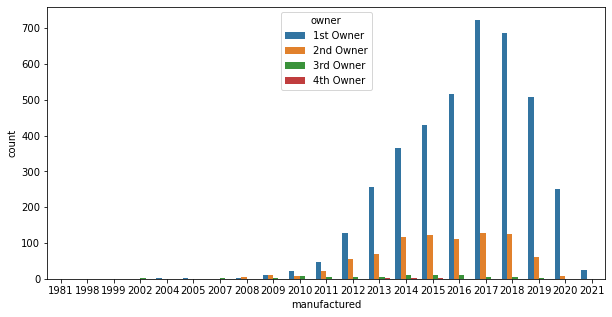

In [356]:
plt.figure(figsize=(10,5))
sns.countplot(x='manufactured',data=df,hue='owner')

In [357]:
cols=['owner','type']
df[cols]=df[cols].fillna(df.mode().iloc[0])

In [358]:
df.isnull().sum()

manufactured    0
brand           0
varient         0
owner           0
fuel            0
type            0
kms             0
price           0
city            0
dtype: int64

# Exploratory Data Analysis

Univariate Data Analysis

<AxesSubplot:xlabel='manufactured', ylabel='count'>

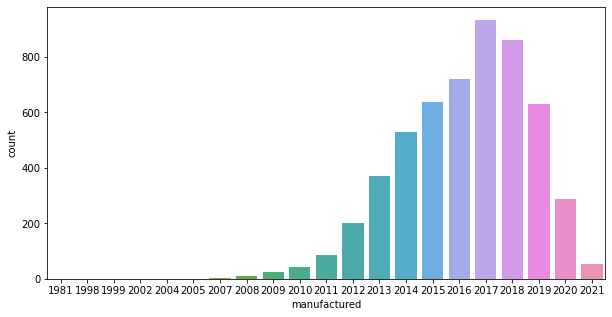

In [359]:
plt.figure(figsize=(10,5))

sns.countplot(df['manufactured'])

(i) Maximum of car listed for sell are of the year 2017 - 2019

(ii) There are very less number of cars which are older than 2008

[Text(0, 0, 'Maruti'),
 Text(1, 0, 'Hyundai'),
 Text(2, 0, 'Honda'),
 Text(3, 0, 'Ford'),
 Text(4, 0, 'Volvo'),
 Text(5, 0, 'Tata'),
 Text(6, 0, 'Toyota'),
 Text(7, 0, 'BMW'),
 Text(8, 0, 'Mahindra'),
 Text(9, 0, 'Datsun'),
 Text(10, 0, 'Audi'),
 Text(11, 0, 'MG'),
 Text(12, 0, 'Skoda'),
 Text(13, 0, 'Renault'),
 Text(14, 0, 'Volkswagen'),
 Text(15, 0, 'Nissan'),
 Text(16, 0, 'KIA'),
 Text(17, 0, 'Jeep'),
 Text(18, 0, 'Mercedes'),
 Text(19, 0, 'Landrover'),
 Text(20, 0, 'Jaguar'),
 Text(21, 0, 'Kia'),
 Text(22, 0, 'Chevrolet'),
 Text(23, 0, 'Mercedes-Benz'),
 Text(24, 0, 'Mitsubishi'),
 Text(25, 0, 'Ambassador'),
 Text(26, 0, 'Land')]

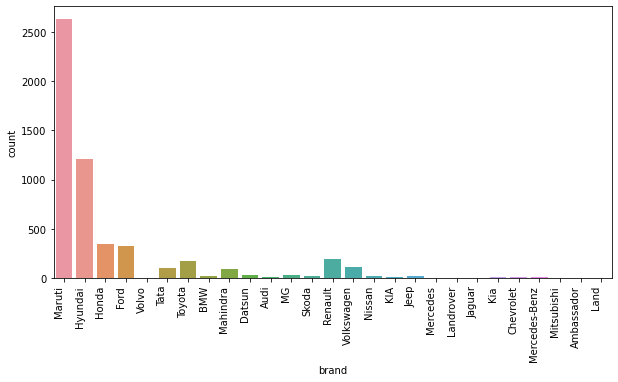

In [360]:
plt.figure(figsize=(10,5))
chart=sns.countplot(x='brand',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

(i) More than half of the cars belongs to Maruti Suzuki

(ii) In second number the car is Hyundai

(iii) Other than Maruti, Hyundai there are number other cars brand which
are in visible in sale. They are Honda,Ford,Tata,Toyuta,Renault,Volkswagan,Mahindra.
Rest all brand are comparitavely very less in count

[Text(0, 0, 'Swift Dzire'),
 Text(1, 0, 'Swift'),
 Text(2, 0, 'Ritz'),
 Text(3, 0, 'i20'),
 Text(4, 0, 'City'),
 Text(5, 0, 'Wagon R 1.0'),
 Text(6, 0, 'Ciaz'),
 Text(7, 0, 'Fiesta'),
 Text(8, 0, 'S60'),
 Text(9, 0, 'Baleno'),
 Text(10, 0, 'Tiago'),
 Text(11, 0, 'Verna'),
 Text(12, 0, 'Fortuner'),
 Text(13, 0, 'X3'),
 Text(14, 0, 'AURA'),
 Text(15, 0, 'Tucson New'),
 Text(16, 0, '3 Series'),
 Text(17, 0, 'TUV300'),
 Text(18, 0, 'S Cross'),
 Text(19, 0, 'New Wagon-R'),
 Text(20, 0, 'Xcent'),
 Text(21, 0, 'Bolero'),
 Text(22, 0, 'IGNIS'),
 Text(23, 0, 'New Figo'),
 Text(24, 0, 'i10'),
 Text(25, 0, 'Creta'),
 Text(26, 0, 'Elite i20'),
 Text(27, 0, 'Redi Go'),
 Text(28, 0, 'VENUE'),
 Text(29, 0, 'Ecosport'),
 Text(30, 0, 'Dzire'),
 Text(31, 0, 'Q3'),
 Text(32, 0, 'Glanza'),
 Text(33, 0, 'Grand i10'),
 Text(34, 0, 'HECTOR'),
 Text(35, 0, 'Innova'),
 Text(36, 0, 'Vitara Brezza'),
 Text(37, 0, 'Amaze'),
 Text(38, 0, 'Ertiga'),
 Text(39, 0, 'Superb'),
 Text(40, 0, 'WR-V'),
 Text(41, 0, 'Jazz')

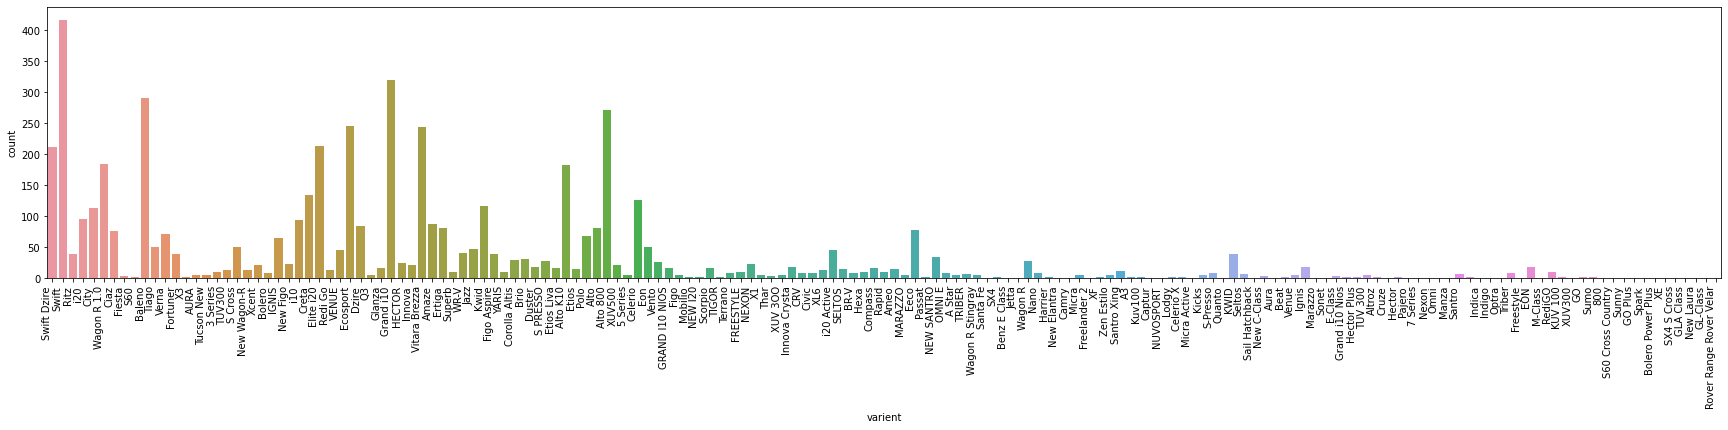

In [361]:
plt.figure(figsize=(30,5))
chart=sns.countplot(x='varient',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

The top models in sales are 

    (i) Maruti Swift
    
    (ii) Baleno
    
    (iii) Grand i 10
    
    (iv) Alto 800
    
    (v) Breeza
    
    (vi) Ecosport
    
    (vii) Elite i 20
    
    (viii) Swift Desire
    
    (ix) Wagnor 1.0
    
    (x) Alto K10

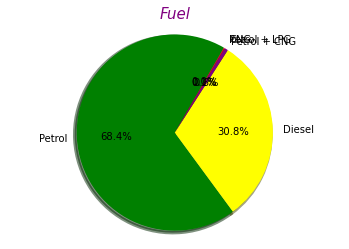

In [362]:
plt.pie(x=df['fuel'].value_counts(),labels=df['fuel'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['green','yellow','purple','red','cyan'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('Fuel',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

(i) 68.4% of cars on sale are Petrol powered

(ii) 30.8% are powered by Diesel

(iii) There are very less quantity of cars which are powered by CNG or Petrol+CNG

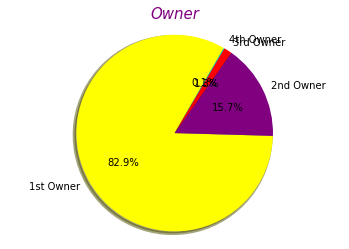

In [363]:
plt.pie(x=df['owner'].value_counts(),labels=df['owner'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['yellow','purple','red','cyan'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('Owner',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

(i) 82 % of the cars posted for sale in websites belongs to first owner

(ii) 15% belongs to second owner

(iii) Very few belongs to 3rd and 4th owner

<AxesSubplot:xlabel='city', ylabel='count'>

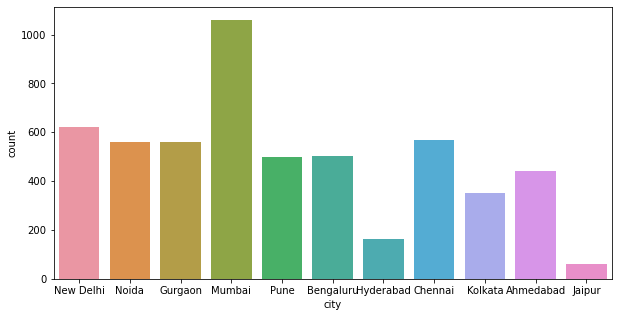

In [364]:
plt.figure(figsize=(10,5))

sns.countplot(df['city'])

(i) There is higher number of selling cars from Mumbai

(ii) New Delhi, Noida, Gurgaon,Pune,Bengaluru,Chennai,Ahmedabad has average number of cars on sale

(iii) Comparitively Jaipur has less number of cars on sale


<AxesSubplot:xlabel='kms', ylabel='Count'>

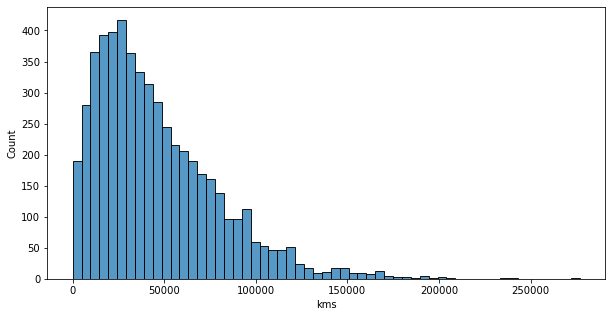

In [365]:
plt.figure(figsize=(10,5))

sns.histplot(df['kms'])

Most of cars are on sales has odometer range between 0 to 70,000

<AxesSubplot:xlabel='price', ylabel='Count'>

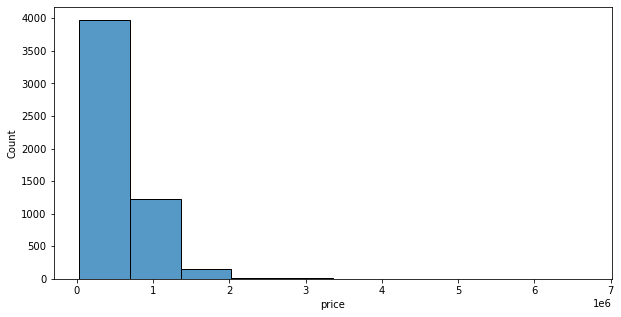

In [366]:
plt.figure(figsize=(10,5))

sns.histplot(df.price, bins=10)

In [367]:
df['age']=2022-df['manufactured']

In [368]:
df.head()

,manufactured,brand,varient,owner,fuel,type,kms,price,city,age
0,2012,Maruti,Swift Dzire,1st Owner,Diesel,Manual,118117,316399,New Delhi,10
1,2013,Maruti,Swift,1st Owner,Diesel,Manual,114506,341599,New Delhi,9
2,2014,Maruti,Ritz,1st Owner,Diesel,Manual,43382,344199,New Delhi,8
3,2013,Hyundai,i20,1st Owner,Diesel,Manual,64361,355799,New Delhi,9
4,2014,Maruti,Swift,1st Owner,Petrol,Manual,107206,401599,New Delhi,8


Bivariate Analysis

[Text(0, 0, 'New Delhi'),
 Text(1, 0, 'Noida'),
 Text(2, 0, 'Gurgaon'),
 Text(3, 0, 'Mumbai'),
 Text(4, 0, 'Pune'),
 Text(5, 0, 'Bengaluru'),
 Text(6, 0, 'Hyderabad'),
 Text(7, 0, 'Chennai'),
 Text(8, 0, 'Kolkata'),
 Text(9, 0, 'Ahmedabad'),
 Text(10, 0, 'Jaipur')]

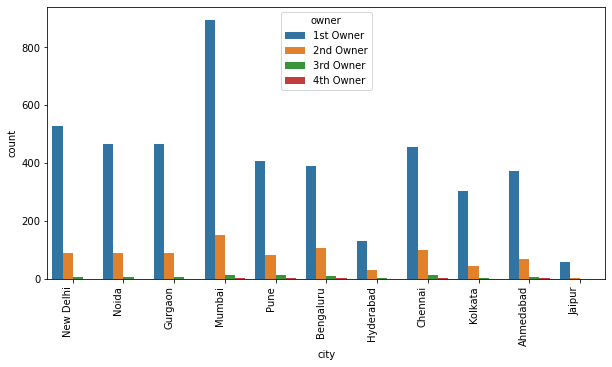

In [369]:
plt.figure(figsize=(10,5))
chart=sns.countplot(x='city',hue='owner',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

(i) owner 1st or second has no impact on city wise cars availability

[Text(0, 0, 'New Delhi'),
 Text(1, 0, 'Noida'),
 Text(2, 0, 'Gurgaon'),
 Text(3, 0, 'Mumbai'),
 Text(4, 0, 'Pune'),
 Text(5, 0, 'Bengaluru'),
 Text(6, 0, 'Hyderabad'),
 Text(7, 0, 'Chennai'),
 Text(8, 0, 'Kolkata'),
 Text(9, 0, 'Ahmedabad'),
 Text(10, 0, 'Jaipur')]

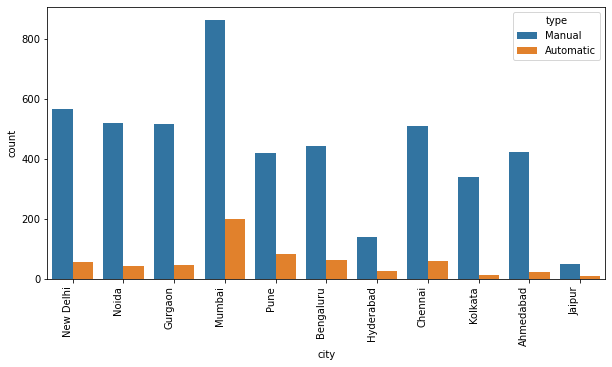

In [370]:
plt.figure(figsize=(10,5))
chart=sns.countplot(x='city',hue='type',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

(i) Type automatic or manual has no impact on city wise cars availability

<AxesSubplot:xlabel='fuel', ylabel='price'>

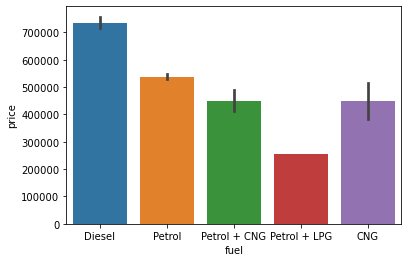

In [371]:
sns.barplot(x='fuel',y='price',data=df)

(i) Diesel engined car has got the maximum price

(ii) Car which are powered by Petrol + LPG has comparitively less price

<AxesSubplot:xlabel='age', ylabel='price'>

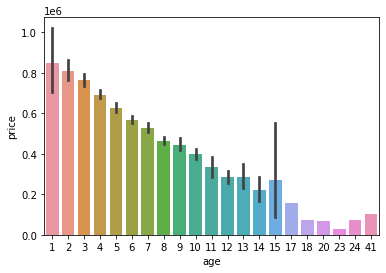

In [372]:
sns.barplot(x='age',y='price',data=df)

The price of car is dependent on age of the car. The older car has less price
and newer are costlier

[Text(0, 0, 'Maruti'),
 Text(1, 0, 'Hyundai'),
 Text(2, 0, 'Honda'),
 Text(3, 0, 'Ford'),
 Text(4, 0, 'Volvo'),
 Text(5, 0, 'Tata'),
 Text(6, 0, 'Toyota'),
 Text(7, 0, 'BMW'),
 Text(8, 0, 'Mahindra'),
 Text(9, 0, 'Datsun'),
 Text(10, 0, 'Audi'),
 Text(11, 0, 'MG'),
 Text(12, 0, 'Skoda'),
 Text(13, 0, 'Renault'),
 Text(14, 0, 'Volkswagen'),
 Text(15, 0, 'Nissan'),
 Text(16, 0, 'KIA'),
 Text(17, 0, 'Jeep'),
 Text(18, 0, 'Mercedes'),
 Text(19, 0, 'Landrover'),
 Text(20, 0, 'Jaguar'),
 Text(21, 0, 'Kia'),
 Text(22, 0, 'Chevrolet'),
 Text(23, 0, 'Mercedes-Benz'),
 Text(24, 0, 'Mitsubishi'),
 Text(25, 0, 'Ambassador'),
 Text(26, 0, 'Land')]

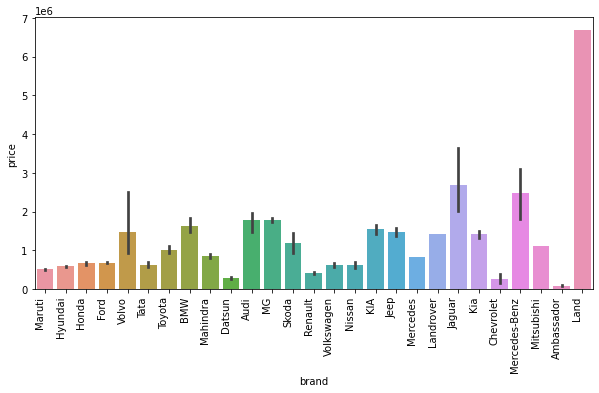

In [373]:
plt.figure(figsize=(10,5))
chart=sns.barplot(x='brand',y='price',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

(i) Land Rover has highest price in all the available cars

(ii) Jaguar, Mercedes-Benz,Audi,MG,BMW,VOLVO,Landrover,Kia,jeep etc comes 
under higher price 

(iii) Ambassador is cheapest car available

(iv) Datsun, Chevrolet,Maruti,Hyundai,Honda,Tata,Ford,Nissan,Mahindra etc has 
lesser price 

<AxesSubplot:xlabel='kms', ylabel='price'>

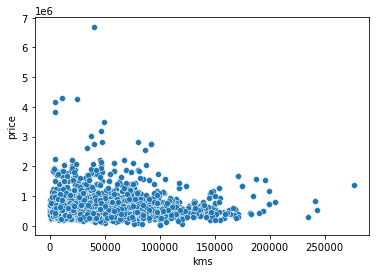

In [374]:
sns.scatterplot(x='kms',y='price',data=df)

We can observe the price has decreased with the increasing lebel of Kms completed by cars

# Removing the Outliers

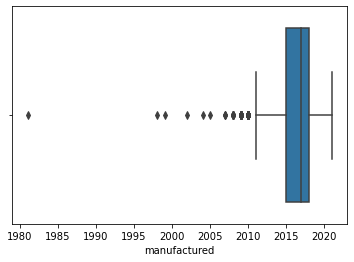

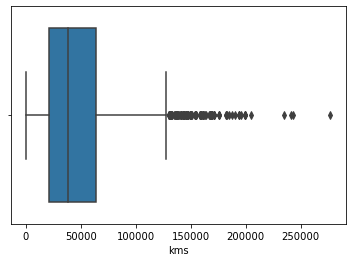

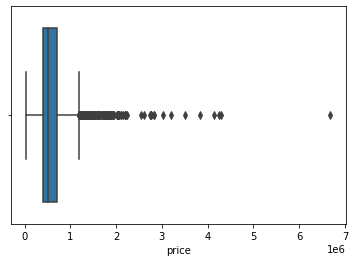

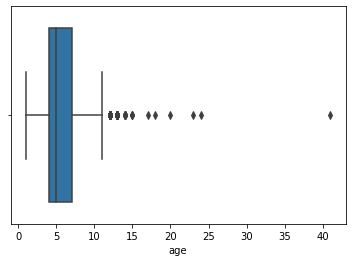

In [375]:
for i in df.columns:
    if df[i].dtypes != object:
        sns.boxplot(df[i])
        plt.show()

There are outliers , we need to remove it

In [376]:
#features with outliers
features=df[['manufactured','kms',]]

In [377]:
from scipy.stats import zscore
z=np.abs(zscore(features))

In [378]:
df.shape

(5387, 10)

In [379]:
df=df[(z<3).all(axis=1)]

In [380]:
df.shape

(5292, 10)

In [381]:
loss=(5397-5292)*100/5397
loss

1.9455252918287937

There is loss of 2 % data which is acceptable

# Removing Skewness

In [382]:
df.skew()

manufactured   -0.453120
kms             0.865059
price           3.802687
age             0.453120
dtype: float64

There is no skewness 

# Encoding of data

In [383]:
# Separating categorical columns in df_new
features=['manufactured']
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        features.append(i)
print(features)

['manufactured', 'brand', 'varient', 'owner', 'fuel', 'type', 'city']


In [384]:
df_encoded=df

In [385]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_encoded[features]= df_encoded[features].apply(LE.fit_transform)

In [386]:
df_encoded.head()

,manufactured,brand,varient,owner,fuel,type,kms,price,city,age
0,3,15,127,0,1,1,118117,316399,8,10
1,4,15,126,0,1,1,114506,341599,8,9
2,5,15,105,0,1,1,43382,344199,8,8
3,4,6,158,0,1,1,64361,355799,8,9
4,5,15,126,0,2,1,107206,401599,8,8


# Spliting of Features and Target

In [387]:
X=df_encoded.drop('price',axis=1)
y=df_encoded['price']

# Correlation

<AxesSubplot:>

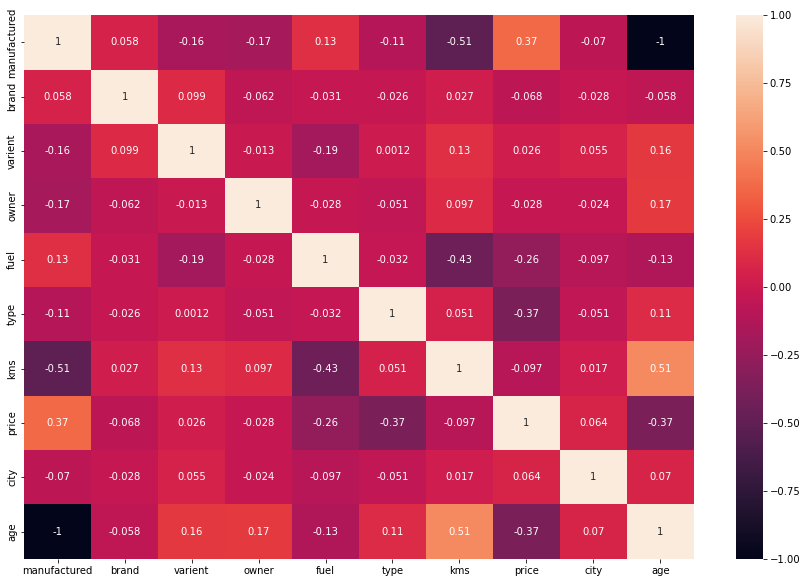

In [388]:
plt.figure(figsize=(15,10))
sns.heatmap(df_encoded.corr(),annot=True)

(i) Manufacture year is positively correlated with price

(ii) Kms ,age,brand are negatively correlated with price

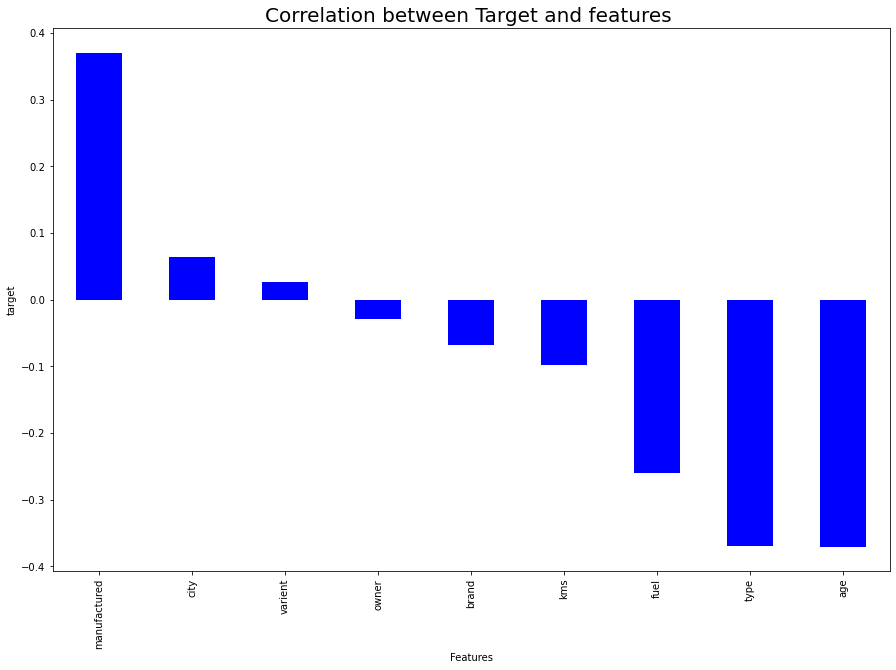

In [389]:
# generationg corraltion bar graph
plt.figure(figsize=(15,10))
df_encoded.corr()['price'].sort_values(ascending=False).drop(['price']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('Correlation between Target and features ',fontsize=20)
plt.show()

# Scaling  of Features

In [391]:
from sklearn.preprocessing import minmax_scale

X[['kms']] = minmax_scale(X[['kms']])

# MultiCillinearity

In [392]:
# checking the VIF values 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,vif,Features
0,16.429463,manufactured
1,1.023485,brand
2,1.075701,varient
3,1.043658,owner
4,1.304374,fuel
5,1.022904,type
6,1.678686,kms
7,1.024760,city
8,18.318936,age


We can select manufactured or age as dependent features so we will drop manufacutred

In [393]:
X.drop('manufactured',axis=1,inplace=True)

# Spliting of training and test data with best random state

In [394]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Maximum r2 score is ",maxAccu,"at Random_state",maxRS)


Maximum r2 score is  0.8949529982912583 at Random_state 81


In [395]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=81)

# Searching for best Model

In [396]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [397]:
def model_test(model):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print("Model Name :",model)
    print('R2_score:',r2_score(y_test,pred))
    print(mean_absolute_error(y_test,pred))
    print(mean_squared_error(y_test,pred))

In [400]:
lr=LinearRegression()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
knn=KNN()
svr=SVR()
SGD=SGDRegressor()
R=Ridge()
models=[lr,rfr,dtr,knn,svr,SGD,R]

In [401]:
for i in models:
    model_test(i)

Model Name : LinearRegression()
R2_score: 0.41593630087645705
163668.044479435
52709139270.88022
Model Name : RandomForestRegressor()
R2_score: 0.8935691695721141
50717.490969773295
9604906917.10025
Model Name : DecisionTreeRegressor()
R2_score: 0.8686624016171725
47001.8476070529
11852631442.515114
Model Name : KNeighborsRegressor()
R2_score: 0.8418353601005881
61407.0750629723
14273652077.156927
Model Name : SVR()
R2_score: -0.04448952891360314
208257.96376691695
94260513243.8439
Model Name : SGDRegressor()
R2_score: -88353002973774.0
2272825101324.1094
7.973463760431609e+24
Model Name : Ridge()
R2_score: 0.4160614692322312
163630.74199343985
52697843386.01919


# Cross Validation Score 

In [405]:
print('LR',cross_val_score(lr,X,y,cv=5).mean())
print('RFR',cross_val_score(rfr,X,y,cv=5).mean())
print('DTR',cross_val_score(dtr,X,y,cv=5).mean())
print('KNN',cross_val_score(knn,X,y,cv=5).mean())
print('SVR',cross_val_score(svr,X,y,cv=5).mean())
print('SGD',cross_val_score(SGD,X,y,cv=5).mean())
print('RIdge',cross_val_score(R,X,cv=5).mean())

LR 0.30929856855595766
RFR 0.7058046622713413
DTR 0.46903023931281157
KNN 0.6966139757665308
SVR -0.09394243400026099
SGD -15093548505262.094
RIdge nan


# Hyper Parameter Tuning 

In [406]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[80,100,200,300],
            'criterion':['mse','mae'],
           'max_features':['auto','sqrt','log2'],
           'min_samples_split':[3,4,5,10,20],
           'max_depth':[2,4,6]}
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=3)
GCV.fit(x_train,y_train)
print('Best Parameters',GCV.best_params_)

Best Parameters {'criterion': 'mse', 'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 300}


In [407]:
fin_model=RandomForestRegressor(criterion='mse',max_depth=6,max_features='auto',min_samples_split=5,n_estimators=100)
fin_model=RandomForestRegressor()
fin_model.fit(x_train,y_train)
pred=fin_model.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))

R2_score: 0.8920392604722379
50636.54124685138
9742974377.786764


# Plotting of model

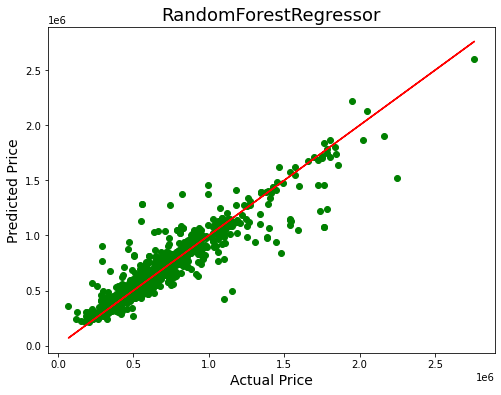

In [408]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color='g')
plt.plot(y_test,y_test,color='r')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('RandomForestRegressor',fontsize=18)
plt.show()

# Saving of Model

In [409]:
import joblib
joblib.dump(fin_model,'car_price_prediction.obj')

['car_price_prediction.obj']

Saved the model for future implementation